<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/2_1_2_1_Lab_Neurons_and_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Neurons and Layers

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential

## Packages

- **Tensorflow** is a machine learning packages developed by Google
- In 2019, Google integrated **Keras** into Tensorflow and released TensorFlow 2.0
- Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow
- This course will use the Keras interface

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Neuron without activation - Regression/Linear Model

### Dataset

- This dataset is from Course 1, linear regression on house prices

In [3]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)      # price in 1000 square feel
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # price in 1000s dollars

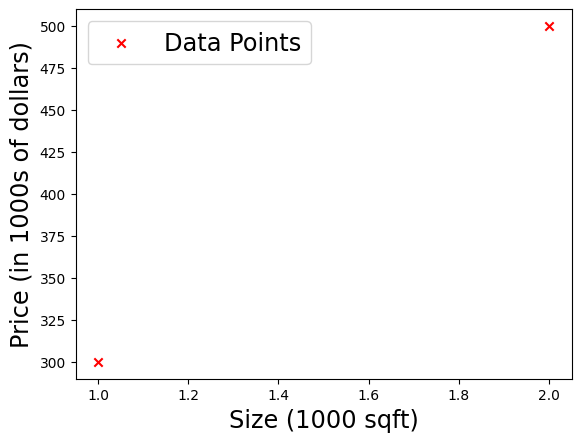

In [4]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train, Y_train, marker='x', c='r', label='Data Points')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
ax.legend(fontsize='xx-large')

plt.show()

### Regression/Linear Model

The function implemented by a neuron with no activation is the same as in Course 1, linear regression:

$$
f_{\vec{w},b}\left(x^{(i)}\right) = \vec{w} \cdot x^{(i)} + b
$$

We can define a layer with one neuron and compare it to the familiar linear regression function.

In [5]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer, type(linear_layer)

(<keras.src.layers.core.dense.Dense at 0x7c2afe7a77f0>,
 keras.src.layers.core.dense.Dense)

In [6]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Training the model on one example in `X_train` will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we reshape it.

In [7]:
al = linear_layer(X_train[0].reshape(1, 1))
print(al)

tf.Tensor([[0.8284682]], shape=(1, 1), dtype=float32)


The result is a **tensor** (another name for an array)) with the shape of (1, 1) or one entry.

In [8]:
al.shape

TensorShape([1, 1])

Now lets take a look at the weights. These weights are **randomly initialized** to small numbers and the bias defaults to 0.

In [9]:
w, b = linear_layer.get_weights()

In [10]:
w

array([[0.8284682]], dtype=float32)

In [11]:
b

array([0.], dtype=float32)

In [12]:
print(f"w = {w}, b={b}")

w = [[0.8284682]], b=[0.]


A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.

In [13]:
type(linear_layer), type(al)

(keras.src.layers.core.dense.Dense,
 tensorflow.python.framework.ops.EagerTensor)

### Setting the weights to a known value

In [14]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [15]:
print(al)

tf.Tensor([[0.8284682]], shape=(1, 1), dtype=float32)


### Comparing $f_{\vec{w},b}\left(x^{(i)}\right) = \vec{w} \cdot x^{(i)} + b$ to the layer output:

In [16]:
al = linear_layer(X_train[0].reshape(1, 1))
print(al)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values. We can use our linear layer to make predictions on our training data

In [17]:
prediction_tf = linear_layer(X_train)
prediction_tf

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

In [18]:
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [19]:
prediction_np = np.dot(X_train, set_w) + set_b
prediction_np

array([[300.],
       [500.]])

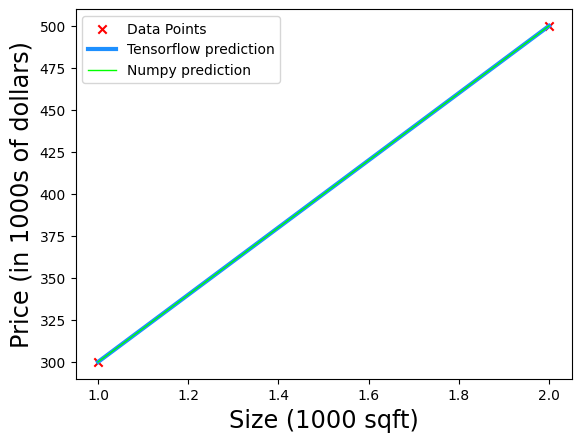

In [20]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train, Y_train, marker='x', c='r', label='Data Points')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')


ax.plot(X_train, prediction_tf, color='dodgerblue', linewidth=3,
        label='Tensorflow prediction')
ax.plot(X_train, prediction_np, color='lime', linewidth=1,
        label='Numpy prediction')

ax.legend()
plt.show()

## Neuron with Sigmoid Activation

The funcdtion implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression:

$$
f_{\vec{w},b}\left(x^{(i)}\right) = g(\vec{w} \cdot x^{(i)} + b)
$$

where

$$
g(x) = sigmoid(x)
$$

### Dataset

In [21]:
X_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

pos = Y_train == 1
neg = Y_train == 0

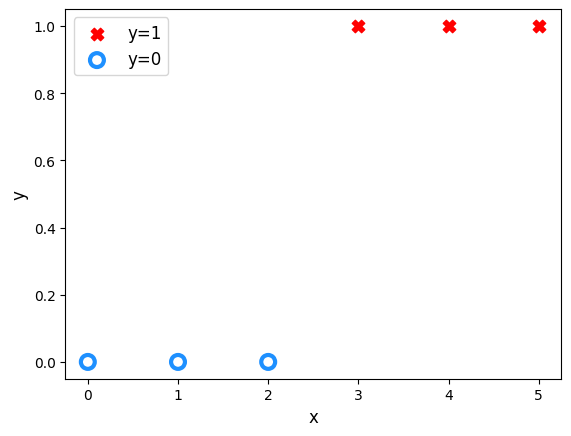

In [22]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train[pos], Y_train[pos], marker='X', c='r', s=80, label='y=1')
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, lw=3,
           label='y=0', facecolors='none', edgecolors='dodgerblue')
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)

ax.legend(fontsize=12)
plt.show()

### Logistic Neuron

We can implement a *logistic neuron* by adding a sigmoid activation. The function of the neuron is then described by $f_{\vec{w},b}\left(x^{(i)}\right) = g(\vec{w} \cdot x^{(i)} + b)$.

This section with create a Tensorflow model that contains our logistic layer to demonstrate an alternate method for creating models. Tensorflow is most often used to create multi-layer models. The [Sequential](https://keras.io/guides/sequential_model/) model is a convenient means of construction these models.

In [23]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
logistic_layer = model.get_layer('L1')
logistic_layer

In [26]:
w, b = logistic_layer.get_weights()
w, b

(array([[-0.02156937]], dtype=float32), array([0.], dtype=float32))

### Setting the weights to known values

In [27]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [28]:
al = model.predict(X_train[0].reshape(1, 1))
alog = sigmoid(np.dot(set_w, X_train[0].reshape(1, 1)) + set_b)

1/1 [==============================] - 0s 125ms/step


In [29]:
print(al)
print(alog)

[[0.01098694]]
[[0.01098694]]


They produce the same values. We can use our logistic layer to make predictions on our training data

In [30]:
model.predict(X_train)

1/1 [==============================] - 0s 39ms/step


array([[0.01098694],
       [0.07585818],
       [0.37754068],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)

In [31]:
sigmoid(np.dot(X_train, set_w) + set_b)

array([[0.01098694],
       [0.07585818],
       [0.37754067],
       [0.81757448],
       [0.97068777],
       [0.99592986]])

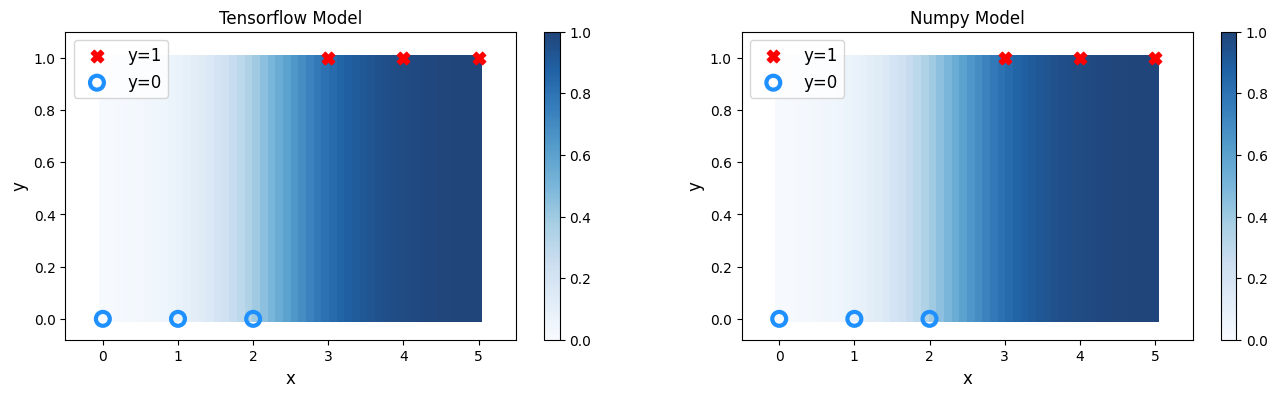

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# for plotting decision boundary with shaded probability
x_space = np.linspace(0, 5, 50)
y_space = np.linspace(0, 1, 50)

ax[0].scatter(X_train[pos], Y_train[pos], marker='X', c='r', s=80,
              label='y=1', zorder=100)
ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, lw=3,
              label='y=0', facecolors='none', edgecolors='dodgerblue',
              zorder=100)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('Tensorflow Model')
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_xlim(-0.5, 5.5)

tf_predict = lambda x: model.predict(x, verbose=0)
z = np.zeros((len(x_space), len(y_space)))
for i in range(len(x_space)):
    x = np.array([[x_space[i]]])
    z[:, i] = tf_predict(x)

cmap = plt.get_cmap('Blues')
pcm = ax[0].pcolormesh(x_space, y_space, z, cmap=cmap, alpha=0.9)
pcm.set_clim(0, 1)
ax[0].figure.colorbar(pcm, ax=ax[0])

ax[0].legend(fontsize=12)


ax[1].scatter(X_train[pos], Y_train[pos], marker='X', c='r', s=80, label='y=1',
              zorder=100)
ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, lw=3,
              label='y=0', facecolors='none', edgecolors='dodgerblue',
              zorder=100)
ax[1].set_ylabel('y', fontsize=12)
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_title('Numpy Model')
ax[1].set_ylim(-0.08, 1.1)
ax[1].set_xlim(-0.5, 5.5)

np_predict = lambda x: sigmoid(np.dot(set_w, x.reshape(1, 1)) + set_b)
z = np.zeros((len(x_space), len(y_space)))
for i in range(len(x_space)):
    x = np.array([[x_space[i]]])
    z[:, i] = np_predict(x)

cmap = plt.get_cmap('Blues')
pcm = ax[1].pcolormesh(x_space, y_space, z, cmap=cmap, alpha=0.9)
pcm.set_clim(0, 1)
ax[1].figure.colorbar(pcm, ax=ax[1])

ax[1].legend(fontsize=12)

plt.show()